# Building a Basic Image Classifier

In [1]:
from torchvision import datasets
datapath = "./data/cifar10/"
cifar10 = datasets.CIFAR10(datapath, train=True, download=True)
cifar10_val = datasets.CIFAR10(datapath, train=False, download=True)

0it [00:00, ?it/s]

Extracting ./data/cifar10/cifar-10-python.tar.gz to ./data/cifar10/
Files already downloaded and verified


## Examine what a Torch Dataset object consists of

In [9]:
', '.join([attr for attr in cifar10.__dir__()])

'root, transform, target_transform, transforms, train, data, targets, classes, class_to_idx, __module__, __doc__, base_folder, url, filename, tgz_md5, train_list, test_list, meta, __init__, _load_meta, __getitem__, __len__, _check_integrity, download, extra_repr, __parameters__, _repr_indent, __repr__, _format_transform_repr, __add__, __orig_bases__, __dict__, __weakref__, __slots__, _is_protocol, __new__, __class_getitem__, __init_subclass__, __hash__, __str__, __getattribute__, __setattr__, __delattr__, __lt__, __le__, __eq__, __ne__, __gt__, __ge__, __reduce_ex__, __reduce__, __subclasshook__, __format__, __sizeof__, __dir__, __class__'

In [11]:
cifar10.class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [22]:
idx_to_class = {cifar10.class_to_idx[idx]: idx for idx in cifar10.class_to_idx}
[idx_to_class[target] for target in cifar10.targets]

['frog',
 'truck',
 'truck',
 'deer',
 'automobile',
 'automobile',
 'bird',
 'horse',
 'ship',
 'cat',
 'deer',
 'horse',
 'horse',
 'bird',
 'truck',
 'truck',
 'truck',
 'cat',
 'bird',
 'frog',
 'deer',
 'cat',
 'frog',
 'frog',
 'bird',
 'frog',
 'cat',
 'dog',
 'deer',
 'airplane',
 'airplane',
 'truck',
 'automobile',
 'cat',
 'deer',
 'airplane',
 'cat',
 'horse',
 'cat',
 'cat',
 'dog',
 'bird',
 'bird',
 'horse',
 'automobile',
 'automobile',
 'automobile',
 'bird',
 'bird',
 'airplane',
 'truck',
 'dog',
 'horse',
 'truck',
 'bird',
 'bird',
 'dog',
 'bird',
 'deer',
 'cat',
 'automobile',
 'automobile',
 'ship',
 'bird',
 'automobile',
 'automobile',
 'deer',
 'truck',
 'horse',
 'ship',
 'dog',
 'truck',
 'frog',
 'horse',
 'cat',
 'automobile',
 'truck',
 'airplane',
 'cat',
 'automobile',
 'cat',
 'dog',
 'deer',
 'dog',
 'horse',
 'horse',
 'deer',
 'horse',
 'truck',
 'deer',
 'bird',
 'cat',
 'ship',
 'airplane',
 'automobile',
 'frog',
 'automobile',
 'automobile',
 

## Display one of the images for sanity check

1: automobile


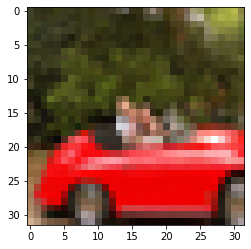

In [23]:
import matplotlib.pyplot as plt

img, label = cifar10[99]
plt.imshow(img)
print(f"{label}: {idx_to_class[label]}")

## But for image classification, we need a tensor represenation (C x H x W layout) of the image data. We'll apply a transform across the whole dataset for this.

In [26]:
from torchvision import transforms

to_tensor = transforms.ToTensor()
tensor_cifar10 = datasets.CIFAR10(datapath, train=True, download=True, transform = to_tensor)
img_tensor, label = tensor_cifar10[99]
img_tensor.shape

Files already downloaded and verified


torch.Size([3, 32, 32])

## It's also important that our NN inputs are scaled to [0, 1]; transforms.ToTensor() should've already taken care of this, but let's verify.

In [27]:
img_tensor.min(), img_tensor.max()

(tensor(0.), tensor(1.))